# Hypertension Prediction Project

## Import Data

In [51]:
import pandas as pd
import numpy as np


import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
# Import data with pandas
DF =  pd.read_csv('health_data.csv')

In [3]:
# Remove Diabetes column from dataframe
if 'Diabetes' in DF.columns:
    DF.pop('Diabetes')

if 'Stroke' in DF.columns:
    DF.pop('Stroke')

print( 'DataFrame has shape: ' , DF.shape)

DataFrame has shape:  (70692, 16)


## Data processing

In [4]:
#Verify if Null values exist in our Data.
DF.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Hypertension            0
dtype: int64

In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Hypertension       

In [6]:
#Change Daaframe Values to Type Int
DF = DF.astype(int)

In [7]:
# Statistical Desription of our variables.
DF.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Hypertension
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.563458
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.495960
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000


In [8]:

def filter_rows(list):
    #Call Global Variable for DF
    global DF           
    for i in list:
        DF = DF[DF[i] <= DF[i].quantile(.85)]
    #Reset Index of df
    DF.reset_index(drop = True , inplace=True)
filter_rows(['BMI'])

# #   Creating the same function without the use of Global-Variables
# def filter_rows(list,DF):
#     for i in list:
#         DF = DF[DF[i] <= DF[i].quantile(.85)]
#     DF.reset_index(drop = True , inplace=True)
# filter_rows(['BMI'],DF)

# Explortary Data Analysis 


In [9]:
DF.Hypertension.value_counts()

1    32127
0    28323
Name: Hypertension, dtype: int64

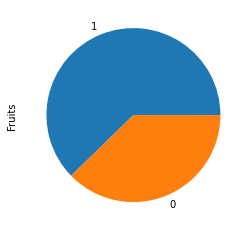

In [10]:
DF.Fruits.value_counts().plot.pie()
plt.show()

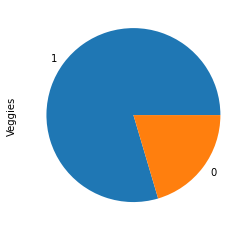

In [11]:
DF.Veggies.value_counts().plot.pie()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='BMI'>

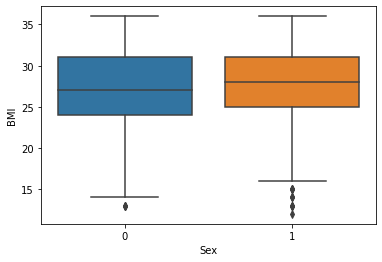

In [12]:
sns.boxplot(DF.Sex,DF.BMI)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hypertension', ylabel='BMI'>

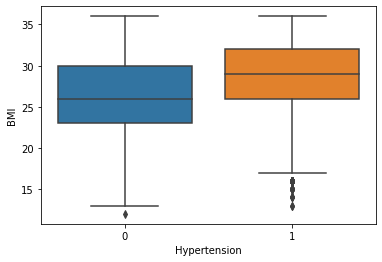

In [13]:
sns.boxplot(DF.Hypertension,DF.BMI)

<AxesSubplot:xlabel='BMI', ylabel='Percent'>

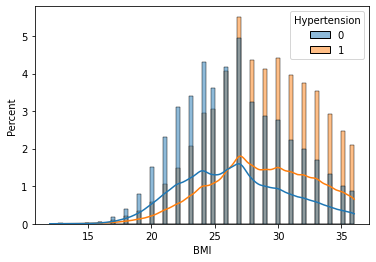

In [14]:
sns.histplot(data=DF,x='BMI',hue='Hypertension',kde=True,stat='percent')

<AxesSubplot:xlabel='Age', ylabel='Percent'>

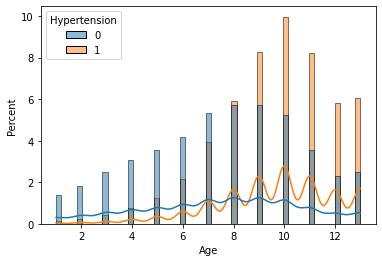

In [15]:
sns.histplot(data=DF,x='Age',hue='Hypertension',kde=True,stat='percent')



<AxesSubplot:xlabel='PhysActivity', ylabel='count'>

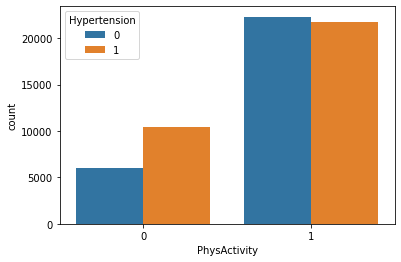

In [16]:
sns.countplot(data=DF,x='PhysActivity',hue='Hypertension')

In [17]:
DF.corr().style.background_gradient(cmap='coolwarm')


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Hypertension
Age,1.000000,-0.009134,0.254952,0.104730,0.035297,0.110209,0.229899,-0.106484,0.058730,-0.024763,-0.060790,0.184531,-0.088420,0.098893,0.205714,0.360668
Sex,-0.009134,1.000000,0.026302,-0.004476,0.104797,0.114420,0.101068,0.039199,-0.094281,-0.063326,0.007635,0.004074,-0.080409,-0.033681,-0.059495,0.052613
HighChol,0.254952,0.026302,1.000000,0.087500,0.155975,0.095302,0.185800,-0.085567,-0.044134,-0.042162,-0.023789,0.237005,0.079371,0.135392,0.152156,0.319821
CholCheck,0.104730,-0.004476,0.087500,1.000000,0.052927,-0.006241,0.044013,-0.004935,0.020440,0.000411,-0.027043,0.058445,-0.015589,0.031470,0.040590,0.101223
BMI,0.035297,0.104797,0.155975,0.052927,1.000000,0.028739,0.072204,-0.115046,-0.077309,-0.049924,-0.050410,0.200572,0.042639,0.078214,0.140181,0.240672
Smoker,0.110209,0.114420,0.095302,-0.006241,0.028739,1.000000,0.124585,-0.085279,-0.081415,-0.035779,0.079093,0.162949,0.094416,0.125031,0.124784,0.096387
HeartDiseaseorAttack,0.229899,0.101068,0.185800,0.044013,0.072204,0.124585,1.000000,-0.099220,-0.020057,-0.037835,-0.038029,0.281439,0.069291,0.194936,0.236420,0.218195
PhysActivity,-0.106484,0.039199,-0.085567,-0.004935,-0.115046,-0.085279,-0.099220,1.000000,0.131094,0.148028,0.013050,-0.260729,-0.120842,-0.218976,-0.256613,-0.124078
Fruits,0.058730,-0.094281,-0.044134,0.020440,-0.077309,-0.081415,-0.020057,0.131094,1.000000,0.235184,-0.038787,-0.095638,-0.060469,-0.045280,-0.044503,-0.034972
Veggies,-0.024763,-0.063326,-0.042162,0.000411,-0.049924,-0.035779,-0.037835,0.148028,0.235184,1.000000,0.021021,-0.118416,-0.052568,-0.068435,-0.083265,-0.066305


# Modeling

**Train/Test Split**

In [37]:
X_train, X_test, y_train, y_test = train_test_split(DF.iloc[:,0:-1],DF.iloc[:, -1], test_size= 0.20)

**Model 0 - LogisticRegression**

In [38]:
model = LogisticRegression()
model.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
predicted = model.predict(X_test)
matrix = confusion_matrix(y_test, predicted)


print('Classification Report: ')
print(classification_report(y_test, predicted))

print('Accuracy score: ')
print(accuracy_score(y_test, predicted))


print('Confusion Matrix: ')
print(matrix)

Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.65      0.68      5693
           1       0.71      0.78      0.74      6397

    accuracy                           0.72     12090
   macro avg       0.72      0.71      0.71     12090
weighted avg       0.72      0.72      0.72     12090

Accuracy score: 
0.7180314309346567
Confusion Matrix: 
[[3704 1989]
 [1420 4977]]


**Model 1 - SGB-Classifier**

In [50]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [48]:
predicted = model.predict(X_test)
matrix = confusion_matrix(y_test, predicted)


print('Classification Report: ')
print(classification_report(y_test, predicted))

print('Accuracy score: ')
print(accuracy_score(y_test, predicted))


print('Confusion Matrix: ')
print(matrix)

Classification Report: 
              precision    recall  f1-score   support

           0       0.73      0.65      0.69      5693
           1       0.72      0.79      0.75      6397

    accuracy                           0.72     12090
   macro avg       0.73      0.72      0.72     12090
weighted avg       0.73      0.72      0.72     12090

Accuracy score: 
0.7241521918941274
Confusion Matrix: 
[[3704 1989]
 [1346 5051]]


**Model 2 - DecisionTree**

In [52]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
predicted = model.predict(X_test)
matrix = confusion_matrix(y_test, predicted)


print('Classification Report: ')
print(classification_report(y_test, predicted))

print('Accuracy score: ')
print(accuracy_score(y_test, predicted))


print('Confusion Matrix: ')
print(matrix)

Classification Report: 
              precision    recall  f1-score   support

           0       0.61      0.64      0.62      5693
           1       0.66      0.63      0.65      6397

    accuracy                           0.63     12090
   macro avg       0.63      0.63      0.63     12090
weighted avg       0.64      0.63      0.63     12090

Accuracy score: 
0.63424317617866
Confusion Matrix: 
[[3639 2054]
 [2368 4029]]
